# **COMP9727 Recommender Systems Assignment 1**
@Author: Jeremy Sha (z5089110)

### EDA

In [218]:
import pandas as pd

df = pd.read_csv('dataset.tsv', sep='\t')

In [184]:
# Look at top 10 categories for each column (aside from lyrics) 
for col in df.columns:
    if col == "lyrics":
        # Skip lyrics column 
        continue 
        
    print(f'Top 10 value percentages for column: {col}')
    
    counts = df[col].value_counts(normalize=True).head(10) * 100
    for val, pct in counts.items():
        print(f'{val}: {pct:.2f}%')
    print('-' * 40)

Top 10 value percentages for column: artist_name
thee oh sees: 1.00%
imagine dragons: 0.87%
tedeschi trucks band: 0.80%
dorothy: 0.80%
ty segall: 0.80%
joe bonamassa: 0.67%
khalid: 0.60%
thank you scientist: 0.60%
dirty heads: 0.60%
rival sons: 0.60%
----------------------------------------
Top 10 value percentages for column: track_name
walls: 0.20%
sympathy: 0.20%
havana: 0.13%
blue skies: 0.13%
remedy: 0.13%
feeling good: 0.13%
superposition: 0.13%
learning: 0.13%
good years: 0.13%
love hurts (feat. travis scott): 0.13%
----------------------------------------
Top 10 value percentages for column: release_date
2017: 27.27%
2018: 26.87%
2016: 25.40%
2019: 20.47%
----------------------------------------
Top 10 value percentages for column: genre
blues: 23.07%
rock: 20.67%
jazz: 15.60%
pop: 14.20%
reggae: 11.80%
country: 11.73%
hip hop: 2.93%
----------------------------------------
Top 10 value percentages for column: topic
dark: 32.67%
sadness: 25.07%
personal: 23.13%
lifestyle: 13.67

In [185]:
# Check NAs 
na_counts = df.isnull().sum()
print(na_counts)

artist_name     0
track_name      0
release_date    0
genre           0
lyrics          0
topic           0
dtype: int64


In [186]:
# Check duplicates (20 duplicates) - Remove later 
df.duplicated().sum()

20

In [187]:
# Eyeball through unique words in lyrics to get a sense of what text processing logic is needed 
from collections import Counter

all_words = ' '.join(df['lyrics']).split()

word_counts = Counter(all_words)

# Print out alphabetically lyrical words along with its count 
for word, count in sorted(word_counts.items()):
    print(f"{word}: {count}")   

aaaah: 10
aaah: 10
aaahaha: 2
aand: 1
ababa: 2
aback: 1
abandon: 5
abdicate: 2
aberration: 1
abide: 4
ability: 1
ablaze: 5
able: 9
abolition: 1
abomination: 2
abound: 1
abroad: 1
absense: 2
absent: 1
absolute: 8
absolutely: 41
absolution: 2
absoul: 1
abstain: 1
absurd: 1
abundantly: 1
abuse: 10
abysm: 1
accelerate: 1
accent: 2
accept: 6
access: 1
accidents: 1
acclimate: 1
accompany: 1
accomplishments: 1
accord: 1
accordion: 1
accumulation: 3
accurate: 2
accusations: 1
accuse: 3
accustom: 1
acdc: 1
ace: 4
ache: 20
achieve: 1
acid: 3
acidfaced: 2
acknowledge: 1
acoustic: 3
acquire: 2
acrid: 1
acryin: 1
act: 14
actin: 5
action: 14
activate: 1
active: 1
activity: 1
actress: 1
actually: 2
adage: 1
adamant: 3
adamantine: 1
adapt: 1
add: 10
addict: 15
addiction: 9
addictions: 1
addictive: 2
additional: 1
address: 2
adjust: 2
adler: 2
admirer: 1
admit: 13
adrenaline: 2
adrift: 1
advance: 1
advantage: 4
adventure: 1
adverse: 2
advertise: 1
advice: 24
afalling: 1
afar: 10
affair: 1
affect: 1
aff

In [6]:
# Seems like lyrics have been quite pre-processed (i.e. lower-cased, no special characters)
# It does however could use some lemmatization/stemming (e.g. singers vs singer). 
#   It also contains some foreign language (most notably korean characters) 

# -----------
# Non english words present in the data 
# -----------
# âcause: 2
# älska: 1
# église: 1
# étais: 1
# étoiles: 1
# órale: 1
# 그때처럼: 1
# 기어서라도: 1
# 기억해주길: 1
# 돌아보길: 1
# 마지막은: 1
# 멈췄으면: 1
# 무너지지마: 1
# 믿는다면: 3
# 믿었기에: 1
# 바라보는: 1
# 바라봐주길: 1
# 방탄소년단의: 1
# 방탄이란: 1
# 뱁새들아: 4
# 언젠가는: 1
# 없었단다: 1
# 영원하길: 1
# 유리천장: 1
# 잃어버리지마: 4
# 잊어버리지마: 7
# 친구들아: 2
# 트램펄린: 1
# 한번쯤은: 1
# 함께라는: 1

# Ideally, we would use a different tokenizer for korean lyrics (e.g. character-based tokenizer) but considering there's only 3 songs out of 1500 songs, 
#   I will use an additional column `has_korean` to capture this instead 

In [188]:
import re

def contains_korean(text):
    # Check for korean unicode characters 
    # Hangul Syllables: [\uAC00-\uD7A3] (most common)
    return bool(re.search(r'[\uAC00-\uD7A3]', text))

In [189]:
df['has_korean'] = df['lyrics'].apply(contains_korean)
df[df['has_korean']]

,artist_name,track_name,release_date,genre,lyrics,topic,has_korean
24,t-rock,be a g about it,2016,hip hop,잊어버리지마 잃어버리지마 잊어버리지마 잃어버리지마 멈췄으면 잊어버리지마 잃어버리지마...,personal,True
1005,bts,not today,2017,pop,방탄소년단의 today underdogs world come lose today t...,personal,True
1108,dua lipa,kiss and make up,2018,pop,talk morning bang head bang head wall scar fal...,emotion,True


In [9]:
# Perform same check for track name 
from collections import Counter

all_words = ' '.join(df['track_name']).split()

word_counts = Counter(all_words)

for word, count in sorted(word_counts.items()):
    print(f"{word}: {count}") 

"alice: 1
#3: 1
&: 25
'n': 1
'sunday: 1
(365: 1
(45: 1
(as: 1
(beware): 1
(blood): 1
(dirty: 1
(en: 1
(end: 1
(feat.: 45
(featuring: 1
(fight: 1
(fingers): 1
(for: 1
(forget: 1
(from: 1
(full): 1
(if: 1
(in: 1
(intro): 1
(is: 1
(jenaux: 1
(joshy: 1
(kiss: 1
(live: 2
(live): 3
(on: 1
(radio: 1
(remains): 1
(single: 1
(solid: 1
(take: 1
(the: 1
(to: 2
(twentyfourseven): 1
(until: 1
(with: 12
(you: 1
(your: 1
...a: 1
/: 5
1: 2
10,000: 1
100%: 1
14: 1
1985: 1
1993: 1
1st: 1
2: 4
21: 1
250: 1
28: 1
2nd: 1
3-5-7: 1
30: 1
3:16: 1
46: 1
4:20/reincarnated: 1
4ever: 1
6: 1
6:00: 1
6am: 1
6lack): 1
7: 2
7-t's: 1
86: 1
9: 1
[REDACTED]: 1
[feat.: 1
a: 51
a.m.: 1
about: 6
about): 2
above: 2
absolute: 1
absolutely: 1
ada: 1
addiction: 1
affection: 1
afro: 1
after: 1
again: 6
against: 3
age: 1
ah: 1
ahead: 2
ain't: 6
ain’t: 1
air: 1
alarm: 1
alchemist: 1
alessia: 1
aligner: 1
alive: 3
all: 22
almost: 1
alone: 1
alright: 1
alrighty: 1
alta: 1
always: 4
am: 4
amateur: 1
amen: 1
america: 3
american: 3
am

In [10]:
# Track name looks a lot dirtier - it's lowercased but contains a lot of symbols. 
# Will have to remove this 

### Summary of EDA:  
- Contains 20 rows of duplicates -> Remove duplicate
- Contains 3 songs with korean lyrics -> capture this using `has_korean` flag
- Lyrics seemed to be quite pre-processed. Track_name could use some preprocessing (contains a lot of symbols)
- Topic is imbalanced (dark: 32.67%, sadness: 25.07%, personal: 23.13%, lifestyle: 13.67%, emotion: 5.47%)

# PART ONE

### Q1.1 and Q1.2

---

#### **Summary of Preprocessing Steps**

1. Remove duplicates  
2. Detect whether `lyrics` contains Korean characters
3. Change whitespace/symbols to `_` in `artist_name` (this is to prevent vectorizer from splitting it into multiple tokens)
4. Create a base `document` column by concatenating `lyrics` and `track_name`  
5. Preprocess the base `document` column:
   - Lowercase text  
   - Remove punctuation  
   - Tokenize on spaces  
   - Remove stop words (sourced from NLTK)
   - Stem words (tested using lemmatisation instead but performed worse)
6. Append additional metadata to the `document` column:  
```
artist_name → artist_name_<value>
genre → genre_<value>
release_date → release_date_<value>
```
7. If the song contains Korean characters, the `"has_korean"` token is also added to the `document` column.

---

#### **Regex might remove too many special character consideration**

This is not so much of a concern in my preprocessing pipeline. As I'm only applying the text cleaning pipeline to `lyrics` and `track_name`, the original regex from tutorial (remove anything that's not a character or whitespace) works fine as is. The `lyrics` column already contains clean text with a few exceptions (e.g. accented characters or Korean lyrics). Only 3 out of the 1500 songs have Korean lyrics, which I've captured separately through the field `has_korean`. 

Other columns (such as `genre`, `artist name`, and `release date`) are encoded differently (e.g. `genre_rock`) as this ensures that the model can distinguish between a word like `"rock"` that appears in the lyrics and `"rock"` as a genre. 

The original regex wouldn't have been appropriate if it was applied to the `artist_name` as `artist_name` would have been split into multiple tokens by the vectorizer. It should be preserved and treated as one token. 

### Text preprocessing 

In [190]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeremysha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeremysha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeremysha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [219]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", '', text) # Remove anything that's not a character, whitespace 
    tokens = text.split() # Use word level tokens 
    tokens = [t for t in tokens if t not in stop_words] # Remove stop words 
    # tokens = [lemmatizer.lemmatize(t) for t in tokens] # Lemmatise words 
    tokens = [ps.stem(word) for word in tokens] # Stem the words 

    return ' '.join(tokens)
    
def preprocess_data(df):
    df = df.copy()
    
    # Remove duplicates 
    df = df.drop_duplicates()
    
    # Add column for has_korean 
    df.loc[:,'has_korean'] = df['lyrics'].apply(contains_korean)
    
    # Change non alpha numeric text to underscores in artist name (including punctuations, symbols and whitespace)
    def replace_non_alphanum_with_underscores(text):
        return re.sub(r'[^\w]', '_', text)
    df.loc[:,'artist_name'] = df['artist_name'].apply(replace_non_alphanum_with_underscores)

    # Define document column which contains all the info per song 
    # Concatenate lyrics and track name first 
    df.loc[:,'document'] = df['lyrics'] + ' ' + df['track_name']
    df.loc[:,'document'] = df['document'].apply(preprocess_text)

    # Concatenate the rest with the format <column_name>_<value> to document 
    cols = ['artist_name', 'genre', 'release_date']
    def concat_columns(row):
        parts = []
        for col in cols:
            val = str(row[col]) if pd.notna(row[col]) else ''
            if val:
                parts.append(f"{col}_{val}")
                
        if row["has_korean"]:
            parts.append("has_korean")
        
        return ' '.join(parts)

    df.loc[:,'document'] = df['document'] + ' ' + df.apply(concat_columns, axis=1)

    return df

In [1178]:
# Preprocess data
df = preprocess_data(df) 

In [38]:
# Sense check output of document 
all_words = ' '.join(df['document']).split()

word_counts = Counter(all_words)

print(f"Number of unique tokens: {len(word_counts)}")
print()

for word, count in sorted(word_counts.items()):
    print(f"{word}: {count}") 

Number of unique tokens: 9491

1: 2
100: 1
10000: 1
14: 1
1985: 1
1993: 1
1st: 1
2: 3
21: 1
250: 1
28: 1
2nd: 1
3: 1
30: 1
316: 1
357: 1
365: 1
420reincarnated: 1
45: 1
46: 1
4ever: 1
6: 1
600: 1
6am: 1
6lack: 1
7: 2
7ts: 1
86: 1
9: 1
aaaah: 10
aaah: 10
aaahaha: 2
aand: 1
ababa: 2
aback: 1
abandon: 5
abdicate: 2
aberration: 1
abide: 4
ability: 1
ablaze: 5
able: 9
abolition: 1
abomination: 2
abound: 1
abroad: 1
absense: 2
absent: 1
absolute: 7
absolutely: 42
absolution: 2
absoul: 1
abstain: 1
absurd: 1
abundantly: 1
abuse: 10
abysm: 1
accelerate: 1
accent: 2
accept: 6
access: 1
accident: 1
acclimate: 1
accompany: 1
accomplishment: 1
accord: 1
accordion: 1
accumulation: 3
accurate: 2
accusation: 1
accuse: 3
accustom: 1
acdc: 1
ace: 4
ache: 20
achieve: 1
acid: 3
acidfaced: 2
acknowledge: 1
acoustic: 3
acquire: 2
acrid: 1
acryin: 1
act: 14
actin: 4
action: 14
activate: 1
active: 1
activity: 1
actress: 1
actually: 2
ada: 1
adage: 1
adamant: 3
adamantine: 1
adapt: 1
add: 10
addict: 15
addict

### Q1.1 + Q1.3

---

#### **Choice of Evaluation Metrics**
Accuracy is easy to interpret but can be biased towards majority class.

Macro F1 gives equal weight to each class but may over-penalise small classes. 

I have selected **F1 macro** as the main evaluation metric as our label is imbalanced. This makes sure minority classes have equal weights to the final score while taking into account of both precision and recall. 

---

#### **Evaluation using 5-fold cross validation instead of train test split**

A **5-fold cross-validation** (CV) strategy is used to evaluate the models. Considering the size of the dataset is quite small (~1500 rows), it benefits to use cv to give us a more accurate picture of model performance 

---

#### **Results: Comparison of performance between BNB and MNB**
As we can see below, MNB has a F1 macro score of **0.74** while BNB only has roughly half of that at **0.33**. We can conclude that **MNB is the superior model**. 

This is likely because MNB models term frequency better, while BNB assumes binary features which may discard useful information to the model.

In [221]:
X = df['document']
y = df['topic']

In [222]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import numpy as np

bnb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', BernoulliNB())
])

mnb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

# Use 5-fold cross-validation to evaluate model
# fixed seed for reproducibility 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

bnb_scores = cross_val_score(bnb_pipeline, X, y, cv=cv, scoring='f1_macro')
mnb_scores = cross_val_score(mnb_pipeline, X, y, cv=cv, scoring='f1_macro')

In [223]:
import matplotlib.pyplot as plt
def plot_model_scores(score_dict):
    models = list(score_dict.keys())
    scores = list(score_dict.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, scores, color='skyblue')
    
    plt.ylabel("Mean F1 Macro Score")
    plt.title("Model Performance Comparison (5 fold cv)")

    # Annotate the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.3f}',
                 ha='center', va='bottom')

    plt.ylim(0, max(scores) + 0.1)
    plt.tight_layout()
    plt.show()

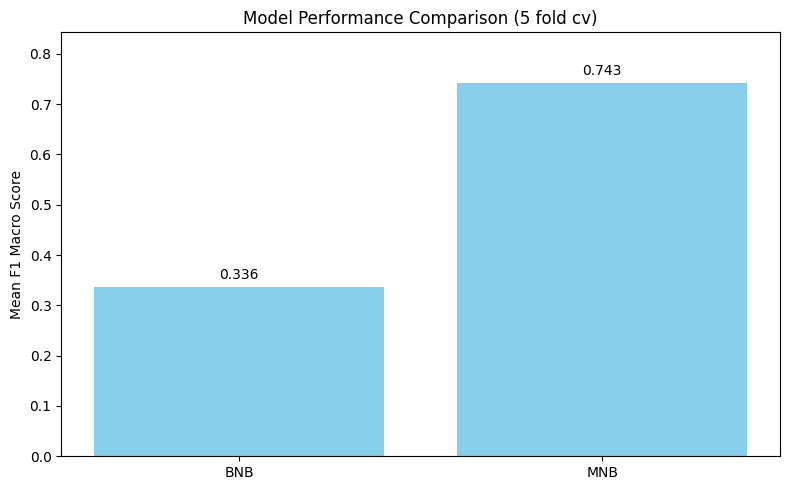

In [224]:
model_scores = {}
model_scores["BNB"] = bnb_scores.mean()
model_scores["MNB"] = mnb_scores.mean()
plot_model_scores(model_scores)

### Q1.4

---

#### **Vocabulary size on classification performance**
When the number of features N is small, both BernoulliNB and MultinomialNB models perform poorly. This is likely due to underfitting as the models lack sufficient information to distinguish between classes.

As N increases, so does the performance, where both model achieved best performance when `N = 500`. Increasing N from this point leads to worse performance, signalling model overfitting past this point

In [197]:
feature_sizes = [50, 100, 250, 500, 1000, 2000, 5000, None]
bnb_scores, mnb_scores = [], []

for n in feature_sizes:
    bnb_pipeline = Pipeline([('vect', CountVectorizer(max_features=n)), ('clf', BernoulliNB())])
    mnb_pipeline = Pipeline([('vect', CountVectorizer(max_features=n)), ('clf', MultinomialNB())])
    
    bnb_f1 = cross_val_score(bnb_pipeline, X, y, cv=cv, scoring='f1_macro').mean()
    mnb_f1 = cross_val_score(mnb_pipeline, X, y, cv=cv, scoring='f1_macro').mean()
    
    bnb_scores.append(bnb_f1)
    mnb_scores.append(mnb_f1)

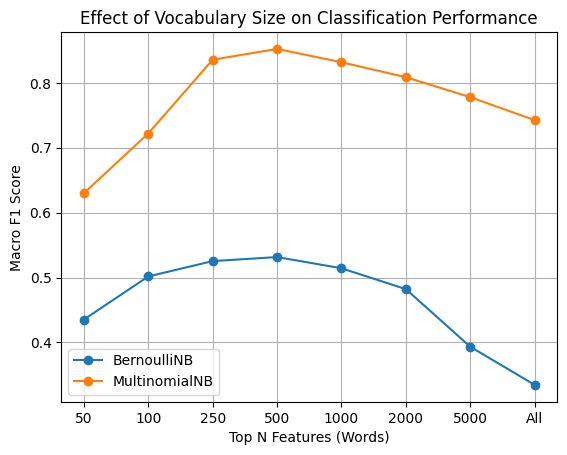

In [198]:
import matplotlib.pyplot as plt

plt.plot(feature_sizes[:-1] + ['All'], bnb_scores, marker='o', label='BernoulliNB')
plt.plot(feature_sizes[:-1] + ['All'], mnb_scores, marker='o', label='MultinomialNB')
plt.xlabel("Top N Features (Words)")
plt.ylabel("Macro F1 Score")
plt.title("Effect of Vocabulary Size on Classification Performance")
plt.legend()
plt.grid(True)
plt.show()

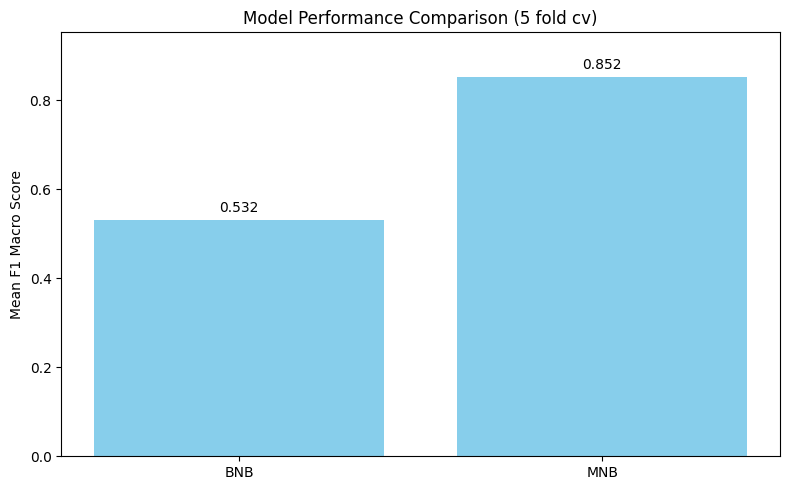

In [199]:
# Model performance using most optimal N
model_scores = {}
model_scores["BNB"] = bnb_scores[optimal_ind]
model_scores["MNB"] = mnb_scores[optimal_ind]
plot_model_scores(model_scores)

### Q1.5 Alternative ML method

---

#### Gradient Boosted Models (GBM)
I have chosen to use `HistGradientBoostingClassifier` which is a sklearn implementation of gradient-boosted decision trees. Unlike Naive Bayes, which assumes feature independence and uses simple probabilistic rules, this method builds an ensemble of decision trees sequentially, using a technique called boosting where each new tree corrects the errors of the previous ones. Theoretically, this makes it more flexible and powerful for capturing complex, non-linear relationships in the data. Empirically, GBMs has been successfully applied in many ML prediction tasks and has been shown to outperform deep learning models on tabular data (source: https://www.sciencedirect.com/science/article/abs/pii/S1566253521002360#preview-section-abstract). This makes it a natural model choice for our topic classification task and the **hypothesis is this model will outperform both BNB and MNB for the reasons above**

#### Pipeline outline 
1. Use the same data from before
2. Run through a TfidfVectorizer (with `num_features` set to `500`) - this was the most optimal setting after experimenting using `CountVectorizer` along with other N values
3. Convert it to a dense array
4. Train a `HistGradientBoostingClassifier`
5. Do a 5 fold cross validation similar to MNB and BNB

Note: 
- Hyperparameters (tree depth, leaf size, regularization, max_features) were tuned using GridSearchCV 
- `class_weight` parameter was also set as `balanced` to reweight training losses (as our class is imbalanced)
- A 20% eval set with early stopping is used to determine number of trees 

#### Results
The final GBM model had a F1 macro score of **0.7**. This unfortunately did not outperform MNB (0.85) but it did outperform BNB (0.54). This is most likely due to a combination of lack of data (<=1500 rows), large feature space (500 features) and sparsity of the feature space. 

Hypothesis has therefore been disproven. **MNB is the superior model and will be used for the rest of the assignment**

In [79]:
# Hyperparameter tuning (grid search) 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(
    max_iter=1000,
    class_weight="balanced", # Using this as label is imbalanced 
    learning_rate=0.5,
    random_state=42,
    # Early stopping parameters 
    early_stopping=True,
    scoring="f1_macro",
    n_iter_no_change=20,
    validation_fraction=0.2,
    # # Hyperparameters 
    # max_depth=10,
    # max_leaf_nodes=31, 
    # l2_regularization=1.0, 
    # min_samples_leaf=20, 
    # max_features=0.75,
)

pipeline = Pipeline([
    ('vect', TfidfVectorizer(max_features=500)), # Tested with CountVectorizer and different max_features - this gives the best performance
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)), # Turning it from sparse to a dense matrix 
    ('clf', model)
])

# Grid of hyperparameters to search
param_grid = {
    'clf__max_depth': [5, 10],
    'clf__max_leaf_nodes': [15, 31],
    'clf__l2_regularization': [0.1, 1.0, 5.0],
    'clf__min_samples_leaf': [1, 5, 10, 20],
    'clf__max_features': [0.5, 0.75, 1.0]
}

# Grid search
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=2,
    n_jobs=-1,
    verbose=True
)

grid.fit(X, y)

# Best params
print("Best Parameters:", grid.best_params_)
print("Best F1 Score on Training Set:", grid.best_score_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Best Parameters: {'clf__l2_regularization': 0.1, 'clf__max_depth': 10, 'clf__max_features': 0.75, 'clf__max_leaf_nodes': 15, 'clf__min_samples_leaf': 1}
Best F1 Score on Training Set: 0.6592478931138503


In [200]:
model = HistGradientBoostingClassifier(
    max_iter=1000,
    class_weight="balanced",
    learning_rate=0.01,
    random_state=42,
    # Early stopping parameters 
    early_stopping=True,
    scoring="f1_macro",
    n_iter_no_change=50,
    validation_fraction=0.2,
    # Hyperparameters (These are from the best parameters) 
    max_depth=10,
    max_leaf_nodes=15, 
    l2_regularization=0.1, 
    min_samples_leaf=1, 
    max_features=0.75,
)

pipeline = Pipeline([
    ('vect', TfidfVectorizer(max_features=500)),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('clf', model)
])
gbm_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

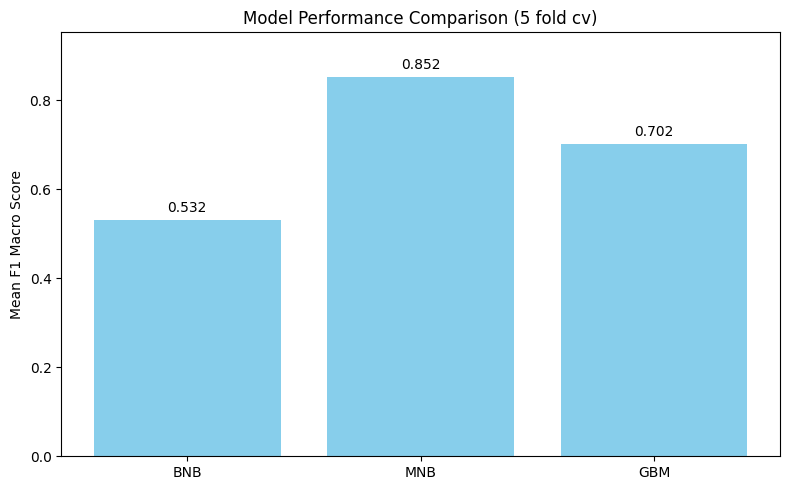

In [201]:
model_scores["GBM"] = gbm_scores.mean()
plot_model_scores(model_scores)

# PART TWO 

### Pipeline overview for Part 2
1. **(start of Q2.1)** Data preprocessing
    1. Split data into train (first 750 rows) and test (row 751-1000)
    2. Preprocess data using same logic from part one
4. Train a topic classifier model on train data using same pipeline/logic from part 2 (MNB with N=500)
5. Get predicted topic for each songs in train and test
6. For each predicted topic, fit a tfidf vectorizer on train data
7. Constructing user profile:
    1. For each topic:
        1. Grab list of user keywords
        2. Since we have run some text preprocessing logic to our song representation (i.e. `document` column), we need to make sure that we run the same text preprocessing logic to the keywords as well. We append these additional keywords to the original list of keywords
        3. Search for songs which `document` column contains at least one of the keywords
        4. These songs are then combined by concatenating the `document` column
        5. Run this user profile through our vectorizer
        6. This gives us user profile's tfidf vectors
        7. Get top M words ranked by TFIDF values 
8.  **(start of Q2.2)** To form recommendation for each user:
    1. For each topic:
        1. Grab top M words ranked by TFIDF values of user profile
        2. Calculate distance to each of the songs in test set
        3. Show top N songs closest to user's profile
9. To evaluate:
    1. For each user: 
        1. For each topic:
           1. Calculate precision@N
        2. Average precision across topic
    2. Average precision across user
    3. Calculate a baseline average precision (which is % of songs that user would have liked if all songs in test was shown to them) for comparison purpose. This is especially important as looking at precision without a baseline can be misleading (e.g. a user actually likes all the songs in the topic will result in a precision of 1 regardless of quality of recommender)

**---------------------------------**

**IMPORTANT NOTE: While the overall logic is outlined above, the way it is implemented in code makes Q2.1, Q2.2 and Q3 coupled (i.e. I implemented all the logic in a `SongRecommender` class). This is a conscious design choice that in my opinion improves code readability and makes more sense. Results are however presented/discussed in the respective sections**

**---------------------------------**

### Training topic classifier

In [533]:
df = pd.read_csv('dataset.tsv', sep='\t')
train_df = df[:750] 
test_df = df[750:1000]

In [534]:
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [535]:
X_train = train_df['document']
y_train = train_df['topic']
X_test = test_df['document']
y_test = test_df['topic']

In [228]:
final_mnb_pipeline  = Pipeline([
    ('vect', CountVectorizer(max_features=500)),
    ('clf', MultinomialNB())
])

# Train MNB model 
final_mnb_pipeline.fit(X_train, y_train)

,steps,"[('vect', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


### Get predicted topic on data

In [536]:
train_df['predicted_topic'] = final_mnb_pipeline.predict(X_train)
test_df['predicted_topic'] = final_mnb_pipeline.predict(X_test)

### SongRecommender class definition

In [1250]:
## SongRecommender class 
from scipy.sparse import csr_matrix, vstack
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

class SongRecommender:
    def __init__(self, topics):
        self.topics = topics
        self.topics_tfidf_vectorizers = {} # Tfidf vectorizer per topic 
        self.topics_train_df = {} # Original dataframe for each song in training per topic e.g.{"topic1": topics_df, "topic2": topic2_df}
        self.topics_test_df = {} # Similar as above but for test 
        self.topics_test_df_vectors = {} # TFidf vectors of songs per topic 
        self.user_topic_profiles = {} # User profiles tfidf values (e.g. {"user1":{"topic1":tfidf_vector, "topic2":tfidf_vector2}})
        self.user_topic_keywords = {} # User keywords dictionary (e.g. {"user1":{"topic1":["kw1","kw2"]}})
        
    def train_topic_tfidf_vectorizers(self, train_df):
        # Train a tfidf vectorizer per topic 
        for topic in self.topics:
            df = train_df[train_df['predicted_topic'] == topic].reset_index(drop=True)
            vectorizer = TfidfVectorizer()
            vectorizer.fit(df['document'])

            self.topics_tfidf_vectorizers[topic] = vectorizer
            self.topics_train_df[topic] = df

    def build_user_profile(self, user_keywords: dict, user_id: str):
        user_profile_vectors = {}
        user_topic_keywords = {}

        for topic in user_keywords:
            vectorizer = self.topics_tfidf_vectorizers[topic] 
            df = self.topics_train_df[topic]

            # Grab user keywords
            topic_keywords = user_keywords.get(topic)

            # Preprocess keywords just like how we preprocessed song lyrics
            clean_topic_keywords = [preprocess_text(x) for x in topic_keywords]

            # Append this to ensure better match rates (+ dedupe)
            topic_keywords = sorted(list(set(topic_keywords + clean_topic_keywords)))

            # Look for songs that contains at least one topic keyword 
            liked_songs_document = df[df['document'].str.contains('|'.join(topic_keywords), case=False)]

            # Logging purpose 
            num_liked = len(liked_songs_document) 
            total_num_songs = len(df)
            print(f"Matched {num_liked} ({round(num_liked*100/total_num_songs, 2)} %) number of songs for {topic} ") # for logging purpose

            # Concatenate this to make a "user-topic level document" 
            combined_text = ' '.join(liked_songs_document['document'])

            # Transform using vectorizer and store it 
            user_profile_vectors[topic] = vectorizer.transform([combined_text])
            
            # Save user keywords 
            user_topic_keywords[topic] = topic_keywords

        self.user_topic_profiles[user_id] = user_profile_vectors
        self.user_topic_keywords[user_id] = user_topic_keywords

    def print_top_m_profile_words(self, user_id, m=20):
        print(f"   User profile for {user_id}")
        print("------------**********-------------")
        for topic in self.user_topic_profiles[user_id]: 
            # Grab user-topic tfidf vector 
            vec = self.user_topic_profiles[user_id][topic].toarray().flatten()
    
            # Grab column names from the vectorizer 
            vocab = self.topics_tfidf_vectorizers[topic].get_feature_names_out()
    
            # Sort descendingly by tfidf values 
            top_indices = np.argsort(vec)[::-1][:m]
    
            result = [(vocab[i], vec[i]) for i in top_indices]

            # Printing out result
            print(f"Topic: {topic}")
            print(f"User Keywords: {self.user_topic_keywords[user_id][topic]}")
            
            print(f"Top {m} words in user's profile ranked by tfidf values")
            for word, score in result:
                print(f"  {word}: {round(score,4)}")
            print("")
            
    ########################################################################
    ##################### Used for Q2.2 ####################################
    ########################################################################
    def vectorize_test_df(self, test_df):
        # Turn test set into tfidf vectors 
        for topic in self.topics:
            df = test_df[test_df['predicted_topic'] == topic].reset_index(drop=True)
            vectorizer = self.topics_tfidf_vectorizers[topic]

            # Vectorize
            df_tfidf_vecs = vectorizer.transform(df['document'])

            self.topics_test_df[topic] = df 
            self.topics_test_df_vectors[topic] = df_tfidf_vecs 
            
    def recommend_for_user(self, user_id, distance_fn="cosine_similarity", top_n=10, top_m_words=None,print_recs=True, print_precision=True):
        precisions = []
        baseline_precisions = []
        user_topic_profiles = self.user_topic_profiles[user_id]
        user_topic_keywords = self.user_topic_keywords[user_id]


        for topic, user_keywords in user_topic_keywords.items():
            # Get user profile vector, song matrix and song data 
            user_vector = user_topic_profiles.get(topic).toarray()
            song_matrix = self.topics_test_df_vectors.get(topic).toarray()
            song_df = self.topics_test_df.get(topic)

            # Get top m words from user profile vector by tfidf values 
            top_indices = user_vector.flatten().argsort()[::-1]
            if top_m_words:
                top_indices = top_indices[:top_m_words]
            
            user_vector = user_vector[:, top_indices]
            song_matrix = song_matrix[:, top_indices]

            # Compute distance to each of the songs 
            if distance_fn == "euclidean_distances":
                dist_matrix = euclidean_distances(user_vector, song_matrix).flatten()
                # Get the song indices (ranked ascendingly - lower dist = better)
                top_song_indices = np.argsort(dist_matrix)[::1][:top_n]
            else:
                dist_matrix = cosine_similarity(user_vector, song_matrix).flatten()
                # Get the song indices (ranked descendingly)
                top_song_indices = np.argsort(dist_matrix)[::-1][:top_n]

            recommended_df = song_df.iloc[top_song_indices].reset_index(drop=True)
            recommended_df['liked'] = recommended_df['document'].str.contains('|'.join(user_keywords), case=False)

            # Calculate baseline precision (i.e. randomly selected a song to user, what is the percentage of song that user listens to) 
            test_df = self.topics_test_df[topic]
            baseline_num_liked_songs = sum(test_df['document'].str.contains('|'.join(user_keywords), case=False))
            baseline_num_songs = len(test_df)
            
            # print out recommendation 
            if print_recs:
                print(f"Topic: {topic}")
                print(f"User keywords: {user_keywords}")
                for idx, row in recommended_df.iterrows():
                    print(f"Top {idx + 1}:{row['track_name']} by {row['artist_name']} — {row['genre']} ({row['release_date']}) {'👍🏻' if row['liked'] else '👎'}")

            # Calculate Precision@K 
            precision = sum(recommended_df['liked']) / len(recommended_df)  
            baseline_precision = round(baseline_num_liked_songs / baseline_num_songs, 2)
            if print_precision:
                print(f"Precision: {precision} (Baseline: {baseline_precision})")
                print("--------------------------")
            precisions.append(precision)
            baseline_precisions.append(baseline_precision)

        avg_precision = sum(precisions) / len(precisions)
        avg_baseline_precision = sum(baseline_precisions) / len(baseline_precisions)

        if print_precision: 
            print(f"Avg precision: {avg_precision} (Baseline: {avg_baseline_precision})")
        
        return avg_precision

    ########################################################################
    ##################### Used for Q3 ####################################
    ########################################################################
    def build_user_profile_with_songnames(self, songnames, user_id):
        # This is a copy paste of <build_user_profile> with slight modifications 
        user_profile_vectors = {}
        user_topic_keywords = {}

        for topic in self.topics:
            vectorizer = self.topics_tfidf_vectorizers[topic] 
            df = self.topics_train_df[topic]

            # We don't use keywords here 
            topic_keywords = []

            # Look for songs that contains at least one topic keyword 
            liked_songs_document = df[df.track_name.isin(songnames)]

            # Logging purpose 
            num_liked = len(liked_songs_document) 
            total_num_songs = len(df)
            print(f"Matched {num_liked} ({round(num_liked*100/total_num_songs, 2)} %) number of songs for {topic} ") # for logging purpose

            # Concatenate this to make a "user-topic level document" 
            combined_text = ' '.join(liked_songs_document['document'])

            if num_liked:
                # Transform using vectorizer and store it 
                user_profile_vectors[topic] = vectorizer.transform([combined_text])
                
                # Save user keywords 
                user_topic_keywords[topic] = ["1"]*num_liked

        self.user_topic_profiles[user_id] = user_profile_vectors
        self.user_topic_keywords[user_id] = user_topic_keywords

    def recommend_for_user_topic_agnostic(self, user_id):
        # This is a copy paste of <recommend_for_user> with slight modifications 
        top_n=10
        top_m_words=2
        combined_recommended_df = pd.DataFrame()
        
        user_topic_profiles = self.user_topic_profiles[user_id]
        user_topic_keywords = self.user_topic_keywords[user_id]

        num_liked_per_topic = {x:len(y) for x, y in user_topic_keywords.items()}
        total_liked = sum(num_liked_per_topic.values())

        alloc = {
            x: round((y/total_liked) * top_n) 
            for x, y in num_liked_per_topic.items()
        }
        remaining_N = top_n
        remaining_topics = len(user_topic_keywords)
        
        for topic, num_like_list in user_topic_keywords.items():
            num_like_in_topic = len(num_like_list) 
            weight = num_like_in_topic / total_liked
            num_song_shown = alloc[topic]
            
            # Get user profile vector, song matrix and song data 
            user_vector = user_topic_profiles.get(topic).toarray()
            song_matrix = self.topics_test_df_vectors.get(topic).toarray()
            song_df = self.topics_test_df.get(topic)

            # Get top m words from user profile vector by tfidf values 
            top_indices = user_vector.flatten().argsort()[::-1]
            if top_m_words:
                top_indices = top_indices[:top_m_words]
            
            user_vector = user_vector[:, top_indices]
            song_matrix = song_matrix[:, top_indices]

            # Compute distance to each of the songs 
            dist_matrix = cosine_similarity(user_vector, song_matrix).flatten()

            if remaining_topics == 1 or remaining_N == 0:
                # Last topic (we need to make sure we use up all allocation) 
                num_song_shown = remaining_N 
            top_song_indices = np.argsort(dist_matrix)[::-1][:num_song_shown]
            top_values = dist_matrix[top_song_indices]

            recommended_df = song_df.iloc[top_song_indices].reset_index(drop=True)

            recommended_df["tfidf_values"] = top_values
            recommended_df["tfidf_weighted_values"] = top_values * weight

            remaining_N = remaining_N - num_song_shown
            remaining_topics = remaining_topics - 1 

            combined_recommended_df = pd.concat([combined_recommended_df,recommended_df], ignore_index=True)

        # combined_recommended_df = combined_recommended_df.sort_values(
        #     by='tfidf_weighted_values',
        #     ascending=False
        # ).reset_index(drop=True)

        # combined_recommended_df = combined_recommended_df[:top_n]
        
        for idx, row in combined_recommended_df.iterrows():
            print(f"Top {idx + 1}:{row['track_name']} by {row['artist_name']} — {row['genre']} ({row['release_date']})")

        return None



### Q2.1 Top TFIDF words for each user profile
---

**Full output of each of the user profile can be found in the cells below.**

#### User1
User profile seems reasonable in each of the topic. Most user keywords appear in the top 20 with 4 out of 5 of the topics top ranked word being a keyword

#### User2
Similar to User1. Interestingly in User1 and User2 emotional profile `good` turns out to be the highest ranked word despite both of them not having it as a keyword 

#### User3
User profile looks reasonable - keywords consistently appear in top 2 of tfidf vector



In [1251]:
song_recommender = SongRecommender(train_df["topic"].unique())

In [1252]:
song_recommender.train_topic_tfidf_vectorizers(train_df)

In [1253]:
def read_user_keywords(filepath): 
    df = pd.read_csv(filepath, sep='\t')
    user_keywords = {
        row['topic']: [kw.strip().lower() for kw in row['keywords'].split(',')]
        for _, row in df.iterrows()
    }

    return user_keywords 

In [1242]:
user1_keywords = read_user_keywords('user1.tsv')

In [1243]:
song_recommender.build_user_profile(user1_keywords, "user1")

Matched 87 (35.51 %) number of songs for dark 
Matched 45 (24.19 %) number of songs for sadness 
Matched 117 (64.64 %) number of songs for personal 
Matched 48 (52.17 %) number of songs for lifestyle 
Matched 30 (68.18 %) number of songs for emotion 


In [1244]:
song_recommender.print_top_m_profile_words("user1")

   User profile for user1
------------**********-------------
Topic: dark
User Keywords: ['enemi', 'enemy', 'fight', 'fire', 'pain', 'storm']
Top 20 words in user's profile ranked by tfidf values
  fight: 0.2833
  know: 0.1713
  black: 0.1588
  like: 0.1574
  grind: 0.1515
  blood: 0.1513
  stand: 0.1403
  come: 0.1401
  yeah: 0.1281
  tell: 0.1193
  gonna: 0.1176
  kill: 0.1086
  hand: 0.1054
  dilli: 0.0961
  lanki: 0.0961
  good: 0.0954
  caus: 0.093
  follow: 0.0923
  peopl: 0.091
  head: 0.0909

Topic: sadness
User Keywords: ['alon', 'alone', 'cri', 'cry', 'heartbroken', 'regret', 'tear', 'tears']
Top 20 words in user's profile ranked by tfidf values
  cri: 0.2993
  tear: 0.2843
  babi: 0.2084
  break: 0.2058
  woah: 0.1655
  fall: 0.1572
  heart: 0.1498
  know: 0.1483
  club: 0.1455
  away: 0.139
  want: 0.1329
  gonna: 0.1318
  feel: 0.1276
  steal: 0.1187
  wish: 0.1161
  wanna: 0.1126
  hurt: 0.1108
  think: 0.1103
  right: 0.1066
  place: 0.1041

Topic: personal
User Keywords

#### User2

In [1245]:
user2_keywords = read_user_keywords('user2.tsv')
song_recommender.build_user_profile(user2_keywords, "user2")

Matched 48 (25.81 %) number of songs for sadness 
Matched 28 (63.64 %) number of songs for emotion 


In [1156]:
song_recommender.print_top_m_profile_words("user2")

   User profile for user2
------------**********-------------
Topic: sadness
User Keywords: ['goodby', 'goodbye', 'lost', 'silenc', 'silence', 'sorrow', 'tear', 'tears']
Top 20 words in user's profile ranked by tfidf values
  tear: 0.2576
  break: 0.2242
  heart: 0.2196
  away: 0.2068
  cri: 0.173
  insid: 0.1578
  woah: 0.1499
  step: 0.1484
  fall: 0.1475
  know: 0.146
  babi: 0.1432
  gonna: 0.1386
  fade: 0.1365
  club: 0.1318
  hurt: 0.1291
  open: 0.1174
  like: 0.1165
  wish: 0.1132
  wanna: 0.1119
  feel: 0.1109

Topic: emotion
User Keywords: ['feel', 'feeling', 'kiss', 'memori', 'memory', 'romanc', 'romance', 'touch']
Top 20 words in user's profile ranked by tfidf values
  good: 0.598
  touch: 0.3387
  feel: 0.3256
  hold: 0.2054
  know: 0.167
  video: 0.1284
  vision: 0.1254
  kiss: 0.1239
  loov: 0.1231
  morn: 0.1206
  vibe: 0.1124
  feelin: 0.111
  go: 0.1108
  miss: 0.1082
  want: 0.1079
  luck: 0.0965
  sunris: 0.0963
  lovin: 0.0917
  gimm: 0.091
  lip: 0.0909



#### User3

In [1181]:
user3_keywords = {"sadness":["die","lie","fade","break"], "lifestyle":["night"]}
song_recommender.build_user_profile(user3_keywords, "user3")

Matched 106 (56.99 %) number of songs for sadness 
Matched 41 (44.57 %) number of songs for lifestyle 


In [1182]:
song_recommender.print_top_m_profile_words("user3")

   User profile for user3
------------**********-------------
Topic: sadness
User Keywords: ['break', 'die', 'fade', 'lie']
Top 20 words in user's profile ranked by tfidf values
  break: 0.4053
  heart: 0.3067
  gonna: 0.1884
  away: 0.1826
  like: 0.1582
  think: 0.1518
  leav: 0.1478
  know: 0.1477
  yeah: 0.1356
  fall: 0.1344
  insid: 0.1229
  feel: 0.1143
  walk: 0.1114
  girl: 0.1102
  hurt: 0.1088
  time: 0.1047
  fade: 0.1039
  look: 0.0992
  babi: 0.0987
  hard: 0.0974

Topic: lifestyle
User Keywords: ['night']
Top 20 words in user's profile ranked by tfidf values
  tonight: 0.3198
  night: 0.3113
  closer: 0.2093
  time: 0.1921
  song: 0.1896
  stranger: 0.1888
  wait: 0.1804
  long: 0.1764
  come: 0.1669
  wanna: 0.1561
  spoil: 0.1559
  tire: 0.1541
  struggl: 0.1507
  right: 0.1465
  home: 0.1337
  play: 0.1223
  yeah: 0.1221
  mind: 0.1206
  telephon: 0.1143
  lose: 0.1115



### Q2.2 Recommendation and evaluation

---

#### Value of N (i.e. number of recommendations shown) and how recommendation is shown 
I have selected `N = 10`. This is because: 
- user must have liked at least one of the songs that we have shown them
  - Looking at the liked songs rate per user (i.e. percent of songs in that predicted topic that user liked): 
    - User A's lowest match rate is 24% in sadness
    - User B's lowest match rate is 25% in sadness
    - User C's lowest match rate is 57% in sadness
    - Note: All this data can be found above in the output of `song_recommender.build_user_profile(...)`
  - This means that if we used a naive recommender that just randomly picks 10 songs to users, the likelihood of any user liking no songs in the top 10 is `(1-24%)^10` which is `6%`. This also means that a user liking at least one song is `94%` which is quite high. Considering this is the worst case scenario (I took the lowest match rate of all users and topic) and that this is the lower bound for a random recommender, this gives me confidence that our recommender will have at least one song that user will like
- this number balances getting enough feedback from user while not overwhelming users with recommendations. There's also only a max of 250 songs in our recommended universe (across all topics) so if we go any higher, we are not far away from recommending the entire list of songs which defeats the purpose of having a recommender

In my version, **recommendation will be shown per topic** (similar to spotify where they create a playlist based on "mood/genre"). User click on the playlist and will be shown a list of songs that are recommended to them. 


#### Evaluation metrics
Chosen metric: **Precision@10**

Other metrics considered:
- **Recall**: Considering we are making the assumption that users only like songs that both matched their interests and were shown in top N recommendation, there is no point in calculating recall (since this will just have a value of 1) 

- **DCG/any variants of DCG**: While DCG is commonly used in ranking problems, it's not very applicable here as we do not have any data on relevance (i.e. the extent of user liking a song). All we have is binary data (i.e. whether user liked the song) which gives the same info as Precision essentially. 

Since I will be showing 10 recommended songs per topic, to aggregate the Precision@10 score per topic, I will simply take a straight average (which is essentially macro precision @ 10). To get one metric across all users, I will also just take a straight average across the users. This does however assumes that user is equally interested about each topic and that each user is equal. In real life we might use user's activity/song interaction as weights to these precisions instead but this data isn't available for this assignment

#### Distance measures 
Both `cosine similarity` and `euclidean distance` were experimented. Unsurprisingly **`cosine similarity`** performed significantly better regardless of `M` as `cosine similarity` works much better for sparse vectors. It also only looks at direction of the vector rather than magnitude, which is especially relevant to our use case as a user profile tfidf vector is constructed by combining multiple songs together. As a result, the average tfidf weights of a user profile is significantly higher than the average tfidf weight of a song, making `euclidean distance` a less optimal choice. Not to mention, all it takes is one keyword to appear in a song for a user to like it - number of times the keyword appears is not relevant but this distinction can't be captured by `euclidean distance` (e.g. distance between 0 and 1 is the same as distance between 1 and 2)

#### Value of `M`
`M = 2` provides the best result across the board. At an overall level as `M` increases, performance decreased. This makes sense as: 
1. **Higher M = more noise**: Since our tfidf vectors were ranked, the more tfidf dimension that you use in the matching equation, the higher the liklihood of you introducing noise to the result
2. **Curse of dimensionality**: Even if we assume that most of the features/dimensions are useful, distance measures still suffer from curse of dimensionality 

#### Analysis of optimal `M` value for each user
From the chart below, we can see that: 
- User 1: optimal value of `M = 2`
- User 2: optimal value of `M = 3` 
- User 3: optimal value of `M = 2`

There is little difference between these users. The low value of `M` comes down to the fact that most important keywords of users appear in the top 3. User 2 has slightly higher optimal `M` which we can trace back to their profile where for the topic `emotion`, the highest ranked keyword `feel` is ranked 3rd

#### Conclusion 
`Cosine similarity` with `M = 2` is the most effective matching algorithm overall

In [1254]:
# Vectorize test df 
song_recommender.vectorize_test_df(test_df)

In [1217]:
# Distance functions to test
dist_func_dict = ["cosine_similarity", "euclidean_distances"]

# M values to test 
M_values = [2, 3, 4, 5, 10, 25, 50, 100, 250, 500, None]

# Store average precisions per distance function
avg_precisions_by_method = {} # e.g. {"cosine_similarity":[avg_precision_m=5, avg_precision_m=10]}
# Store individual user precisions 
individual_precisions_by_method = {}# e.g. {"cosine_similarity":[(user1_precision_m=5, user2_precision_m=5, user3_precision_m=5)]}

# Loop over each distance function
for dist_func in dist_func_dict:
    avg_precisions = []
    individual_precisions = []  # list of (p1, p2, p3) tuples

    for M in M_values:
        p1 = song_recommender.recommend_for_user("user1", distance_fn=dist_func, top_m_words=M, print_precision=False,print_recs=False)
        p2 = song_recommender.recommend_for_user("user2", distance_fn=dist_func, top_m_words=M, print_precision=False,print_recs=False)
        p3 = song_recommender.recommend_for_user("user3", distance_fn=dist_func, top_m_words=M, print_precision=False,print_recs=False)

        avg = (p1 + p2 + p3) / 3
        avg_precisions.append(avg)
        individual_precisions.append((p1, p2, p3))

    avg_precisions_by_method[dist_func] = avg_precisions
    individual_precisions_by_method[dist_func] = individual_precisions


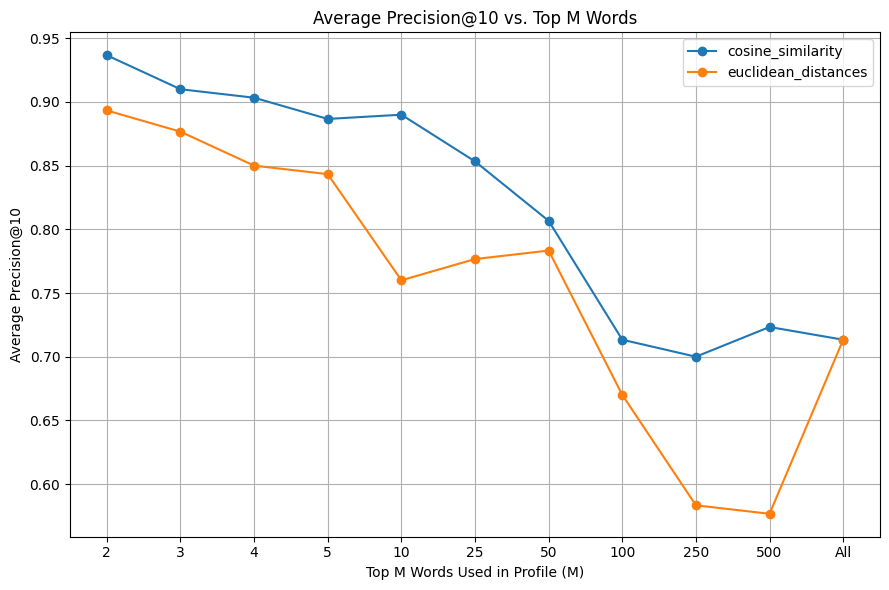

In [1218]:
x_labels = [str(m) if m is not None else "All" for m in M_values]

plt.figure(figsize=(9, 6))

for method_name, avg_precisions in avg_precisions_by_method.items():
    plt.plot(x_labels, avg_precisions, marker='o', label=method_name)

plt.title("Average Precision@10 vs. Top M Words")
plt.xlabel("Top M Words Used in Profile (M)")
plt.ylabel("Average Precision@10")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

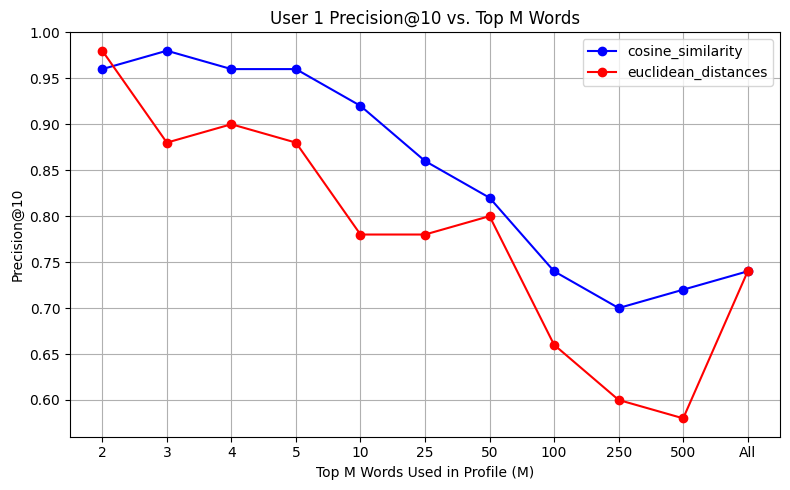

In [1205]:
plt.figure(figsize=(8, 5))

colors = {
    "cosine_similarity": "blue",
    "euclidean_distances": "red"
}

for method_name, user_precisions_list in individual_precisions_by_method.items():
    user1_precisions = [t[0] for t in user_precisions_list]  # Only p1 from (p1, p2, p3)
    plt.plot(x_labels, user1_precisions, marker='o', label=method_name, color=colors[method_name])

plt.title("User 1 Precision@10 vs. Top M Words")
plt.xlabel("Top M Words Used in Profile (M)")
plt.ylabel("Precision@10")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


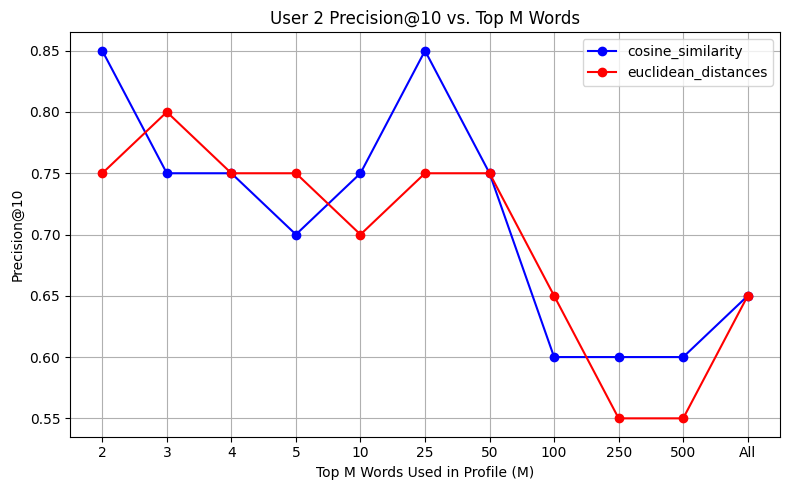

In [1206]:
x_labels = [str(m) if m is not None else "All" for m in M_values]
plt.figure(figsize=(8, 5))

colors = {
    "cosine_similarity": "blue",
    "euclidean_distances": "red"
}

for method_name, user_precisions_list in individual_precisions_by_method.items():
    user1_precisions = [t[1] for t in user_precisions_list]
    plt.plot(x_labels, user1_precisions, marker='o', label=method_name, color=colors[method_name])

plt.title("User 2 Precision@10 vs. Top M Words")
plt.xlabel("Top M Words Used in Profile (M)")
plt.ylabel("Precision@10")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


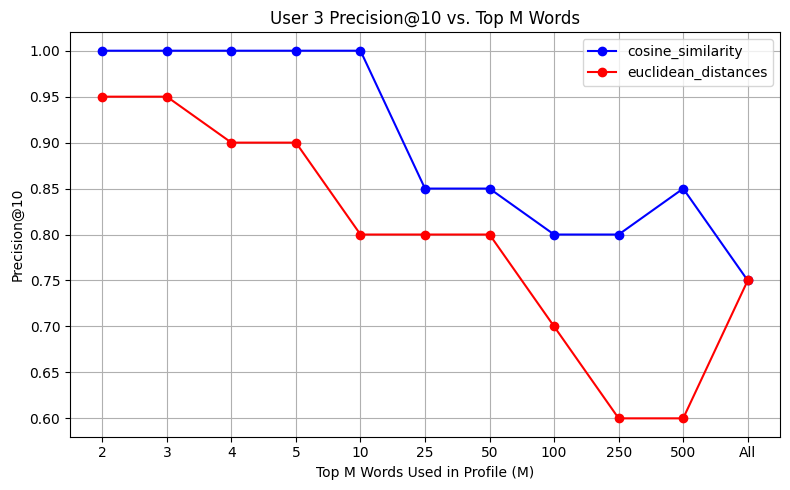

In [1207]:
x_labels = [str(m) if m is not None else "All" for m in M_values]
plt.figure(figsize=(8, 5))

colors = {
    "cosine_similarity": "blue",
    "euclidean_distances": "red"
}

for method_name, user_precisions_list in individual_precisions_by_method.items():
    user1_precisions = [t[2] for t in user_precisions_list]
    plt.plot(x_labels, user1_precisions, marker='o', label=method_name, color=colors[method_name])

plt.title("User 3 Precision@10 vs. Top M Words")
plt.xlabel("Top M Words Used in Profile (M)")
plt.ylabel("Precision@10")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Individual user's recommendation 

In [1221]:
song_recommender.recommend_for_user("user1", top_m_words=2)

Topic: dark
User keywords: ['enemi', 'enemy', 'fight', 'fire', 'pain', 'storm']
Top 1:white man's world by jason_isbell_and_the_400_unit — country (2017) 👍🏻
Top 2:bella ciao by klischée — jazz (2018) 👍🏻
Top 3:the snake by eric_church — country (2018) 👍🏻
Top 4:around the corner by rick_braun — jazz (2019) 👍🏻
Top 5:still by hunter_hayes — country (2019) 👍🏻
Top 6:hellohello by dj_grumble — jazz (2018) 👍🏻
Top 7:boy in the bubble by alec_benjamin — pop (2018) 👍🏻
Top 8:no new friends (feat. sia, diplo, and labrinth) by sia — pop (2019) 👍🏻
Top 9:knees by bebe_rexha — pop (2018) 👍🏻
Top 10:stuck by leprous — jazz (2017) 👍🏻
Precision: 1.0 (Baseline: 0.24)
--------------------------
Topic: sadness
User keywords: ['alon', 'alone', 'cri', 'cry', 'heartbroken', 'regret', 'tear', 'tears']
Top 1:will you be mine by anita_baker — jazz (2017) 👍🏻
Top 2:scared of the dark (feat. xxxtentacion) by lil_wayne — pop (2018) 👍🏻
Top 3:[REDACTED] you by hazhe — hip hop (2018) 👍🏻
Top 4:cry to me by skip_marley — re

0.96

In [1222]:
song_recommender.recommend_for_user("user2", top_m_words=2)

Topic: sadness
User keywords: ['goodby', 'goodbye', 'lost', 'silenc', 'silence', 'sorrow', 'tear', 'tears']
Top 1:remind me to forget by kygo — pop (2017) 👍🏻
Top 2:torn in two by breaking_benjamin — rock (2018) 👍🏻
Top 3:will you be mine by anita_baker — jazz (2017) 👍🏻
Top 4:something new by babe_rainbow — reggae (2019) 👍🏻
Top 5:the greatest by six60 — reggae (2019) 👍🏻
Top 6:home by the_movement — reggae (2016) 👍🏻
Top 7:terraformer by thank_you_scientist — jazz (2019) 👍🏻
Top 8:scared of the dark (feat. xxxtentacion) by lil_wayne — pop (2018) 👍🏻
Top 9:i can't stop dreaming by soja — reggae (2017) 👍🏻
Top 10:california by big___rich — country (2017) 👍🏻
Precision: 1.0 (Baseline: 0.22)
--------------------------
Topic: emotion
User keywords: ['feel', 'feeling', 'kiss', 'memori', 'memory', 'romanc', 'romance', 'touch']
Top 1:i did something bad by taylor_swift — pop (2017) 👍🏻
Top 2:false alarm by the_weeknd — pop (2016) 👎
Top 3:wasteman by jada_kingdom — reggae (2018) 👎
Top 4:do you really by

0.85

In [1223]:
song_recommender.recommend_for_user("user3", top_m_words=2)

Topic: sadness
User keywords: ['break', 'die', 'fade', 'lie']
Top 1:stay with me by ayokay — pop (2018) 👍🏻
Top 2:will you be mine by anita_baker — jazz (2017) 👍🏻
Top 3:rewrite the stars by zac_efron — pop (2017) 👍🏻
Top 4:the greatest by six60 — reggae (2019) 👍🏻
Top 5:something new by babe_rainbow — reggae (2019) 👍🏻
Top 6:sarah, surrender by gov_t_mule — blues (2017) 👍🏻
Top 7:hearts of habit by black_pistol_fire — blues (2017) 👍🏻
Top 8:home by the_movement — reggae (2016) 👍🏻
Top 9:little one by highly_suspect — rock (2016) 👍🏻
Top 10:torn in two by breaking_benjamin — rock (2018) 👍🏻
Precision: 1.0 (Baseline: 0.59)
--------------------------
Topic: lifestyle
User keywords: ['night', 'parti', 'party']
Top 1:light up the night by jamie_berry — jazz (2019) 👍🏻
Top 2:come down by anthony_gomes — blues (2018) 👍🏻
Top 3:baroness by wolfmother — blues (2016) 👍🏻
Top 4:it's only right by wallows — rock (2018) 👍🏻
Top 5:rethymno by digitalluc — jazz (2019) 👍🏻
Top 6:21 summer by brothers_osborne — coun

1.0

# PART THREE

### Q3 User testing

---
#### Testing procedure
1. Test user was shown 10 randomly chosen songs in week 1, 2, 3.
2. Test user listened to all 30 songs and indicated the ones they enjoyed listening to
3. The songs which user liked was concatenated to build a user profile just like in Part 2
4. 10 songs from week 4 were then recommended to user using the recommender
    1. My song recommender shows 10 songs per topic by default.
    2. To achieve 10 songs in total, I first calculate the proportion of liked songs in each topic (e.g. 5 out of 10 songs user liked is in `emotion` -> weight of 0.5 for `emotion` songs)
    3. I then multiplied these weights by the total number of recommendations (10) to determine how many songs to select from each topic (e.g. 5 songs from emotion)  
    4. Within each topic, I selected the top songs based on cosine similarity to the user profile, then merged them to form the final recommendation 
5. User listens to all 10 songs to determine which ones they like
6. Gather feedback

### Results 
|          | Songs Liked | Songs Shown | Precision |
|---------------|-------------|-------------|-----------|
| Random (W1–3) | 7|30        | 23%       |
| Recommended (W4)  | 6|10        | 60%       |

For songs that were randomly selected and shown to test user during week 1 to 3, user liked **23%** of them (precision)

During week 4, test user however liked **60%** of the songs (precision) that were recommended to them, signalling that our song recommender is indeed learning user's preference

This is however significantly lower than the precision we saw in part 2 where average precision was **94%**. This is due to the fact that in Part 2 we made the assumption that user's music preference can indeed be deterministically captured by keywords. This is far from reality as user's music preference is normally more nuanced. Information like rhythm, melody, seasonality are some of the important dimensions that aren't captured here. 

### Feedback 
While user enjoyed the experience, one of the key feedback is that user didn't like the binary response method. There are songs that they absolutely love and would love to hear more of (e.g. natural by imagine dragons) while there are some songs that they only slightly prefer. A scale response would have been more appropriate

They didn't enjoy country music but seemed like in the recommendation there were still country music. 

They also found the song universe quite niche - they have only previously heard 1-2 songs from all of the songs recommended. A broader song universe would have been fantastic 

### Conclusion
Overall, while the system demonstrated promising recommendation capabilities, its quality is still far from sufficient for commercial use. This highlights the inherent limitations of keyword-only recommender systems.

=

In [1171]:
def randomly_select_n_songs(df, n=10):
    df = df.sample(n=n, random_state=42).reset_index(drop=True)
    for idx, row in df.iterrows():
        print(f"Top {idx + 1} :{row['track_name']} by {row['artist_name']} — {row['genre']} ({row['release_date']})")

In [1172]:
# WEEK 1 recommendation
randomly_select_n_songs(train_df[:250])

Top 1 :vivo hip hop (live) by skool_77 — hip hop (2017)
Top 2 :trap door by rebelution — reggae (2018)
Top 3 :outrunning karma by alec_benjamin — pop (2018)
Top 4 :we are come to outlive our brains by phish — blues (2018)
Top 5 :shout sister shout by madeleine_peyroux — jazz (2016)
Top 6 :what i could do by janiva_magness — blues (2018)
Top 7 :if you met me first by eric_ethridge — country (2018)
Top 8 :natural by imagine_dragons — rock (2018)
Top 9 :never land by eli_young_band — country (2017)
Top 10 :john the revelator by larkin_poe — blues (2017)


In [1173]:
# WEEK 2 recommendation
randomly_select_n_songs(train_df[250:500])

Top 1 :stupid deep by jon_bellion — rock (2018)
Top 2 :black tar by the_kills — blues (2016)
Top 3 :the good doctor by haken — jazz (2018)
Top 4 :american tune by allen_toussaint — blues (2016)
Top 5 :i have this hope by tenth_avenue_north — rock (2016)
Top 6 :heaven falls / fall on me by surfaces — pop (2018)
Top 7 :devils got you beat by blues_saraceno — blues (2019)
Top 8 :this is it by the_wood_brothers — blues (2018)
Top 9 :tesselation by mild_high_club — rock (2016)
Top 10 :snake charmer by parov_stelar — jazz (2019)


In [1174]:
# WEEK 3 recommendation
randomly_select_n_songs(train_df[500:750])

Top 1 :unleashed by killswitch_engage — rock (2019)
Top 2 :buy my own drinks by runaway_june — pop (2019)
Top 3 :cascade by the_dear_hunter — jazz (2016)
Top 4 :i only lie when i love you by royal_blood — blues (2017)
Top 5 :next to me by overtime — country (2016)
Top 6 :right left wrong by three_days_grace — rock (2018)
Top 7 :seventeen by peach_pit — rock (2018)
Top 8 :the dark horse always wins by blues_saraceno — blues (2018)
Top 9 :you’re worthy of it all by shane___shane — rock (2017)
Top 10 :all i c is u & me by death_from_above_1979 — blues (2017)


In [1225]:
# User liked 
user_liked_songs = [
     "trap door",
     "shout sister shout",
     "natural",
     "never land",
     "black tar",
     "snake charmer",
     "next to me"
]

baseline_precision = len(user_liked_songs) / 30
print(f"Baseline precision: {round(baseline_precision,2)}") 

Baseline precision: 0.23


In [1248]:
# Building user profile based on songnames liked 
song_recommender.build_user_profile_with_songnames(user_liked_songs, "user123")

Matched 5 (2.04 %) number of songs for dark 
Matched 1 (1.09 %) number of songs for lifestyle 
Matched 1 (0.54 %) number of songs for sadness 
Matched 0 (0.0 %) number of songs for emotion 
Matched 0 (0.0 %) number of songs for personal 


In [1176]:
# Building user profile based on songnames liked 
song_recommender.build_user_profile_with_songnames(user_liked_songs, "user123")

Matched 5 (2.04 %) number of songs for dark 
Matched 1 (1.09 %) number of songs for lifestyle 
Matched 1 (0.54 %) number of songs for sadness 
Matched 0 (0.0 %) number of songs for emotion 
Matched 0 (0.0 %) number of songs for personal 


In [1177]:
# Recommending user songs based on their profile 
song_recommender.recommend_for_user_topic_agnostic("user123")

Top 1:shout bamalama by the_detroit_cobras — blues (2016)
Top 2:donner bell by deca — jazz (2019)
Top 3:hellohello by dj_grumble — jazz (2018)
Top 4:the mystic by adam_jensen — rock (2016)
Top 5:the snake by eric_church — country (2018)
Top 6:around the corner by rick_braun — jazz (2019)
Top 7:knees by bebe_rexha — pop (2018)
Top 8:love is alive by louis_the_child — pop (2017)
Top 9:stigmata by grandson — rock (2019)
Top 10:black by dierks_bentley — country (2016)


In [1226]:
user_liked_recommended_songs = [
    "shout bamalama",
    "donner bell",
    "hellohello",
    "the mystic",
    "the snake",
    "knees"
]

precision = len(user_liked_recommended_songs) / 10 
print(f"Precision: {round(precision,2)} (Baseline: {round(baseline_precision,2)})") 

Precision: 0.6 (Baseline: 0.23)
